In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tutorial 5 : Splines and DeBoor Cox algorithm

In this lab session, we are going to plot a 2D B-spline curve using the deBoor-Cox algorithm.

## Spline curve
We recall that the B-spline $S(t)$ of degree $k$ associated to the nodes $t_0 = \cdots = t_{k} < t_{k+1} < \cdots < t_N < t_{N+1} = \cdots = t_{N+k+1}$  and to the control polygon $[D] = [D_0...D_N]$, then the B-spline writes 
$$
S(t) = \sum_{i=0}^{N} D_i \, N_i^k(t), \quad t \in [t_{k},t_{N+1}] \quad \hbox{(parameter space)}.
$$

## DeBoor-Cox algorithm
The DeBoor-Cox algorithm is a triangular scheme that allows to calculate  $S(t)$  for $t \in [t_k, t_{N+1}]$. The algorithm works as follows.

1. Determine $r$ such that $t_r \leq  t < t_{r+1}$
2. Initialisation: $D^0_{i}=D_i$ for $i\in\{r-k,\cdots,r\}$
3. For $j = 1$ to $k$:

   For $i=r-k+j$ to $r$:

$$\displaystyle{D^j_i := {(t-t_i) * D_{i}^{j-1} + (t_{i+k-j+1}-t) * D_{i-1}^{j-1} \over t_{i+k-j+1}-t_i}}$$

Return: $S(t) := D^{k}_r$
# Question 1: implementation
1. write a function that that associates to $k$ a set of nodes $(t_i)$.
2. Write a function that evaluates to $k$, $[D]$ and a parameter $t$, the evaluation $S(t)$ (using the DeBoor-Cox algorithm).

In [50]:
def padding(x,k):
    return np.array([x[0]]*k+list(x)+[x[-1]]*k)

In [51]:
def get_r(t,T):
    if t >= T[-1]:
        return int((2*len(T)-4)/3 + 1)
    for i in range(len(T)-1):
        if T[i] <= t < T[i+1]:
            return i

In [52]:
def DeBoor(k, D, t, T):
    T = padding(T, k)
    r = get_r(t, T)
    Q = np.zeros((k+1, r+1, 2))
    Q[0,r-k:r+1] = D[r-k:r+1]
    for j in range(1, k+1):
        for i in range(r-k+j, r+1):
            Q[j,i] = ((t-T[i])*Q[j-1,i]+(T[i+k-j+1]-t)*Q[j-1,i-1])/(T[i+k-j+1]-T[i])
    return Q[k, r]

# Question 2: plot several splines curves for diffent values of $k$. What do you observe ?

In [106]:
Poly = np.array([[0,0],[1,1],[2,1],[3,2],[4,2],[5,0],[6,0],[7,2],[8,3],[9,4],[10,0]])

In [107]:
def plotDeBoor(D,maxk):
    Poly = np.array(list(D) + [D[-1]]*(maxk-1))
    plt.figure(figsize=(12,7))
    plt.scatter(*Poly.T)
    T = np.linspace(0,2,300)
    for k in np.arange(1,maxk+1):
        approx = np.array([DeBoor(k, Poly, t, np.linspace(0,2*np.max(D[:,0]),100)) for t in T])
        plt.plot(*approx.T, label='k = '+str(k))

    plt.legend();
    plt.show()

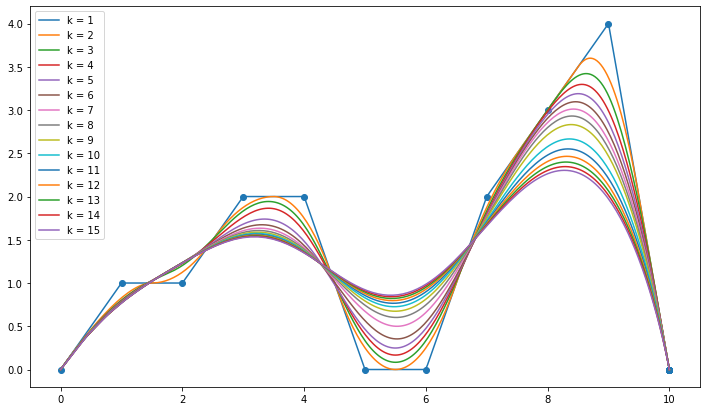

In [110]:
plotDeBoor(Poly,15)